In [8]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#2 loading the dataset
import pandas as pd

file_path = '/content/drive/MyDrive/concepts and technology of AI /bank.csv'
df = pd.read_csv(file_path)



In [13]:
# Step 3: Inspect DataFrame info
print("DataFrame Info:")
df.info()

# Step 4: Identify object-type columns
object_columns = df.select_dtypes(include='object').columns
print("\nObject-type columns:", object_columns.tolist())

# Step 5: Unique values in object columns
for col in object_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Step 6: Null values in each column
print("\nNull values per column:")
print(df.isnull().sum())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Object-type columns: ['job', 'marital', 'education', 'default', 'housing', 'loan',

In [15]:
# Step 7: Drop object-type columns and save to new CSV
df_numeric = df.drop(columns=object_columns)
df_numeric.to_csv('/content/drive/MyDrive/concepts and technology of AI /banknumericdata.csv', index=False)


In [17]:
# Step 8: Read the new CSV and show summary statistics
df_new = pd.read_csv('/content/drive/MyDrive/concepts and technology of AI /banknumericdata.csv')
print("\nSummary statistics of numeric data:")
print(df_new.describe())



Summary statistics of numeric data:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0

In [18]:
#problem 2 Data Imputations
#load the dataset
import pandas as pd

file_path = '/content/drive/MyDrive/concepts and technology of AI /medical_students_dataset.csv'
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


In [19]:
#check info and find missing value
print("\nDataFrame Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing values per column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weigh

In [21]:

# Fill numerical columns with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].mean())
df['Blood Pressure'] = df['Blood Pressure'].fillna(df['Blood Pressure'].mean())
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())


In [24]:
#use mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Blood Type'] = df['Blood Type'].fillna(df['Blood Type'].mode()[0])
df['Diabetes'] = df['Diabetes'].fillna(df['Diabetes'].mode()[0])
df['Smoking'] = df['Smoking'].fillna(df['Smoking'].mode()[0])


In [26]:
#check and remove duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("\nData after removing duplicates:")
print(df.head())



Number of duplicate rows: 0

Data after removing duplicates:
   Student ID        Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.000000  Female  161.777924  72.354947          O  27.645835   
1         2.0  26.021561    Male  152.069157  47.630941          B  23.338869   
2         3.0  32.000000  Female  182.537664  55.741083          A  16.729017   
3         3.0  30.000000    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.000000  Female  174.947103  46.234173          O  23.338869   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0    98.600948        95.0      109.000000        203.0       No      No  
1    98.714977        93.0      104.000000        163.0       No      No  
2    98.260293        76.0      130.000000        216.0      Yes      No  
3    98.839605        99.0      112.000000        141.0       No     Yes  
4    98.480008        95.0      114.558033        231.0       No      No  


In [29]:
#problem1 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
import pandas as pd

#load the titanic dataset
file_path = '/content/drive/MyDrive/concepts and technology of AI /Titanic-Dataset.csv'
df = pd.read_csv(file_path)
#subset the dataframe
# Select specific columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter for first-class passengers (Pclass == 1)
first_class_df = subset_df[subset_df['Pclass'] == 1]

#step3 calculate fare statistics

mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

print("Fare statistics for first-class passengers:")
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")


Fare statistics for first-class passengers:
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [30]:
#problem 2
#step 1 counting null values
# Count missing values in 'Age'
null_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_count}")
# Drop rows where 'Age' is null
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])

# Confirm the change
print(f"New shape after dropping nulls: {first_class_df_cleaned.shape}")


Number of null values in 'Age': 30
New shape after dropping nulls: (186, 6)


In [31]:
#problem 3
# task 1Create one-hot encoded columns
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# task2 Add encoded columns to original DataFrame
df = pd.concat([df, embarked_encoded], axis=1)

# taks3 Drop the original 'Embarked' column
df.drop(columns=['Embarked'], inplace=True)

# task4 View the first few rows of the modified DataFrame
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Mean survival rates by gender:
      Sex  Survived
0  female  0.742038
1    male  0.188908


/tmp/ipython-input-3012444495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=survival_by_gender, palette='pastel')


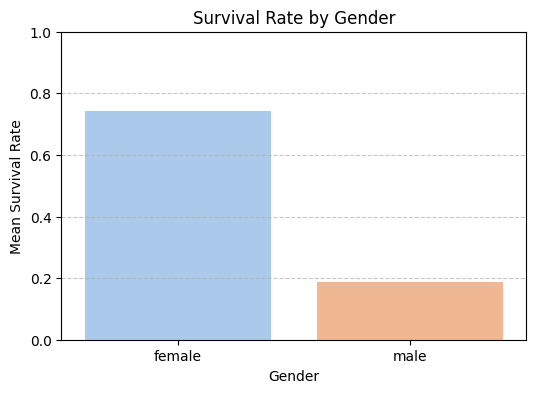

In [34]:
#problem 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
file_path = '/content/drive/MyDrive/concepts and technology of AI /Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Group by 'Sex' and calculate mean survival rate
survival_by_gender = df.groupby('Sex')['Survived'].mean().reset_index()

# Print survival rates
print("Mean survival rates by gender:")
print(survival_by_gender)

# Plot the survival distribution
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=survival_by_gender, palette='pastel')
plt.title('Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


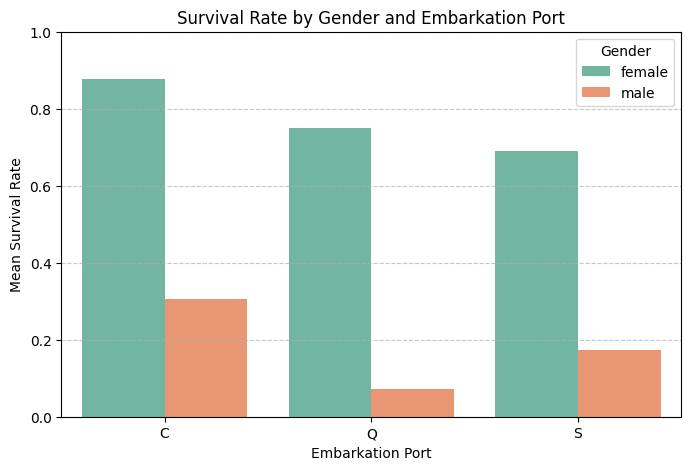

In [33]:
#problem 5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = '/content/drive/MyDrive/concepts and technology of AI /Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Drop rows with missing 'Embarked' or 'Sex' values
df = df.dropna(subset=['Embarked', 'Sex'])

# Group by 'Sex' and 'Embarked' and calculate mean survival rate
grouped = df.groupby(['Sex', 'Embarked'])['Survived'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=grouped, palette='Set2')
plt.title('Survival Rate by Gender and Embarkation Port')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Embarkation Port')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()


/tmp/ipython-input-1716270357.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()


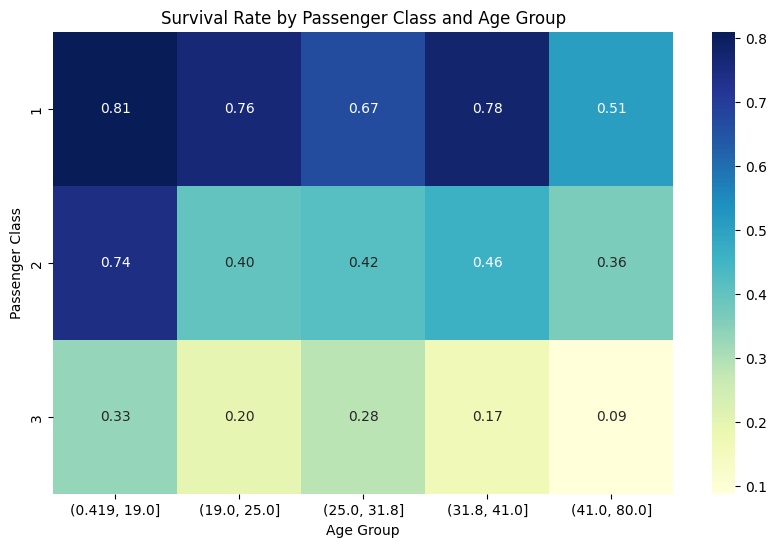

In [35]:
#problem 6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = '/content/drive/MyDrive/concepts and technology of AI /Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Drop rows with missing 'Age'
df = df.dropna(subset=['Age'])

# Create 5 quantile-based age groups
df['AgeGroup'] = pd.qcut(df['Age'], q=5)

# Group by 'Pclass' and 'AgeGroup' and calculate mean survival rate
grouped = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival Rate by Passenger Class and Age Group')
plt.ylabel('Passenger Class')
plt.xlabel('Age Group')
plt.show()
